I just found out the abbreviation of "Pleistocene marine" and "Pleistocene moraine” are the same, pm. Hence, the models were trained by considering they are the same facies. I need to modify the scripts to redo the grid searching and model building. In the mean time, I'll modify the issues we had but choose to neglect.
1. Change the abbreviation and update the excelfile.
1. Rreplace factprizing in wasafacies.py by adopting the labels in the excel directly. This would solve the inconsistent facies factorization among different data representations.
1. Modify the sections in the sandflat which we discussed in `ML_element_16.ipynb`.

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

#plt.style.use('ggplot')
plt.style.use('seaborn-paper')
#mpl.rcParams['xtick.labelsize'] = 8
#mpl.rcParams["image.cmap"] = 'gray'
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['savefig.bbox'] = 'tight'

import datetime
date = datetime.datetime.now().strftime('%Y%m%d')

# Issue with sandflat
I removed the confusing section N36-2 and add the sections VC13-2 1-120 // N49-3 14-97 // N50-2 36-145. I noticed the section depth of N50-2 is accumated after N50-1 during the scanning. This is why there is 26 cm addition comparing to the photo in Kernbeschreibung.

In [2]:
info_df = pd.read_csv('data/info.cleaned.all.csv', index_col=0, 
                      usecols=['composite_id', 'core_section', 'section_depth_mm'])

In [3]:
data_df = pd.read_csv('data/XRF_results.cleaned.all.csv', index_col=0, usecols=['composite_id', 'K'])

In [4]:
data_df = pd.concat([info_df, data_df], axis=1, join='inner')

In [6]:
data_df[data_df.core_section == 'N50-2']

,core_section,section_depth_mm,K
composite_id,,,
N50_00711,N50-2,258.0,2060
N50_00713,N50-2,260.0,1944
N50_00715,N50-2,262.0,2162
N50_00717,N50-2,264.0,2490
N50_00719,N50-2,266.0,2254
...,...,...,...
N50_01895,N50-2,1442.0,3297
N50_01897,N50-2,1444.0,3957
N50_01899,N50-2,1446.0,4036


# Invetigate data
Let's see if the updated excel and wasafacies.py works fine.

In [2]:
from wasafacies import PrepareData

prepare = PrepareData()
facies, id_list = prepare.create_recla()
norm_df = prepare.create_raw(facies=facies, id_list=id_list)

In [3]:
norm_df

,Si,S,Cl,K,Ca,Ti,Fe,Br,Rb,Sr,Zr,Ba,facies,core_section
composite_id,,,,,,,,,,,,,,
N13_01061,1.544013,-0.453575,1.575990,1.262540,5.459750,0.242561,1.593151,-5.571569,-3.779810,1.187686,-1.152729,-1.908008,0,N13-4
N13_01063,1.069966,-0.836390,1.405270,0.957658,4.799013,0.059768,1.275176,-2.725524,-1.865322,0.416864,-2.350830,-2.205648,0,N13-4
N13_01065,1.262182,-0.878135,1.286899,1.600369,4.938115,-0.304634,1.103600,-2.466519,-2.243376,0.179951,-2.148065,-2.330387,0,N13-4
N13_01067,1.124714,-0.617847,1.541846,1.219073,6.122396,-0.377462,1.247243,-5.832783,-1.542324,1.038308,-1.556117,-2.367047,0,N13-4
N13_01069,1.128258,-1.070888,1.344948,0.717981,5.172118,-0.331221,0.803906,-2.986946,-2.047398,0.353627,-1.476354,-1.608031,0,N13-4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
N16_02900,1.234334,-1.124063,1.029366,2.220239,3.067967,1.805874,2.550476,-6.531235,-1.474989,-1.321749,-0.290959,-1.165259,10,N16-2
N16_02902,1.100322,-1.531275,0.953150,2.071958,2.963512,1.507173,2.431023,-4.286672,-1.707833,-1.572579,-0.542530,-1.386250,10,N16-2
N16_02904,1.208626,-1.195651,1.087018,2.192472,3.143816,1.652909,2.568166,-6.556944,-1.195651,-1.309919,-0.543228,-1.051612,10,N16-2


In [4]:
print(norm_df.core_section.unique())
print('{} core sections'.format(
    len(norm_df.core_section.unique())))

['N13-4' 'N11-2' 'N28-1' 'VVC20-4' 'N16-4' 'VVC19-4' 'N41-4' 'N41-2'
 'N40-1' 'N25-3' 'N30-4' 'N34-2' 'N46-1' 'N31-1' 'N32-3' 'N40-4' 'N36-4'
 'N26-4' 'N38-4' 'N43-3' 'VC13-2' 'N49-3' 'N50-2' 'N11-1' 'VVC20-2' 'W5-2'
 'W4-3' 'N85-3' 'VVC17-3' 'N71-4' 'N43-1' 'VVC16-4' 'VVC09-4' 'VVC17-2'
 'N23-4' 'N18-5' 'N13-2' 'N13-3' 'N23-1' 'N16-1' 'N18-2' 'N71-1' 'N23-2'
 'N15-1' 'N15-2' 'VVC17-1' 'N23-3' 'N71-3' 'VVC20-1' 'N14-1' 'N15-4'
 'N14-2' 'N16-2']
53 core sections


In [5]:
old_section = pd.read_csv('data/XRF_ML_c.csv', usecols=['core_section'], squeeze=True)
print(len(old_section.unique()))

347


In [6]:
347/53

6.547169811320755

In [7]:
158909/19823

8.016395096604954

The data amount is around 1/8 of the data adopting the labels created by the "experts". The section amount is about 1/6.

In [22]:
grouping = norm_df[['facies', 'core_section']].groupby('facies').count()
grouping.columns = ['data_point']

In [24]:
sections = []
for fa in grouping.index:
    sections.append(
        len(norm_df.loc[norm_df.facies == fa, 
        'core_section'].unique())
    )

grouping['core_section'] = sections

In [25]:
from wasafacies import Evaluation
eva = Evaluation()
grouping.index = eva.get_Facies()

grouping

,data_point,core_section
hsm,1768,6
hcf,2795,7
lcf,1220,3
sf,3937,8
mf,1343,5
la,1165,5
pt,855,6
so,405,4
pm,2390,7
pef,2983,8


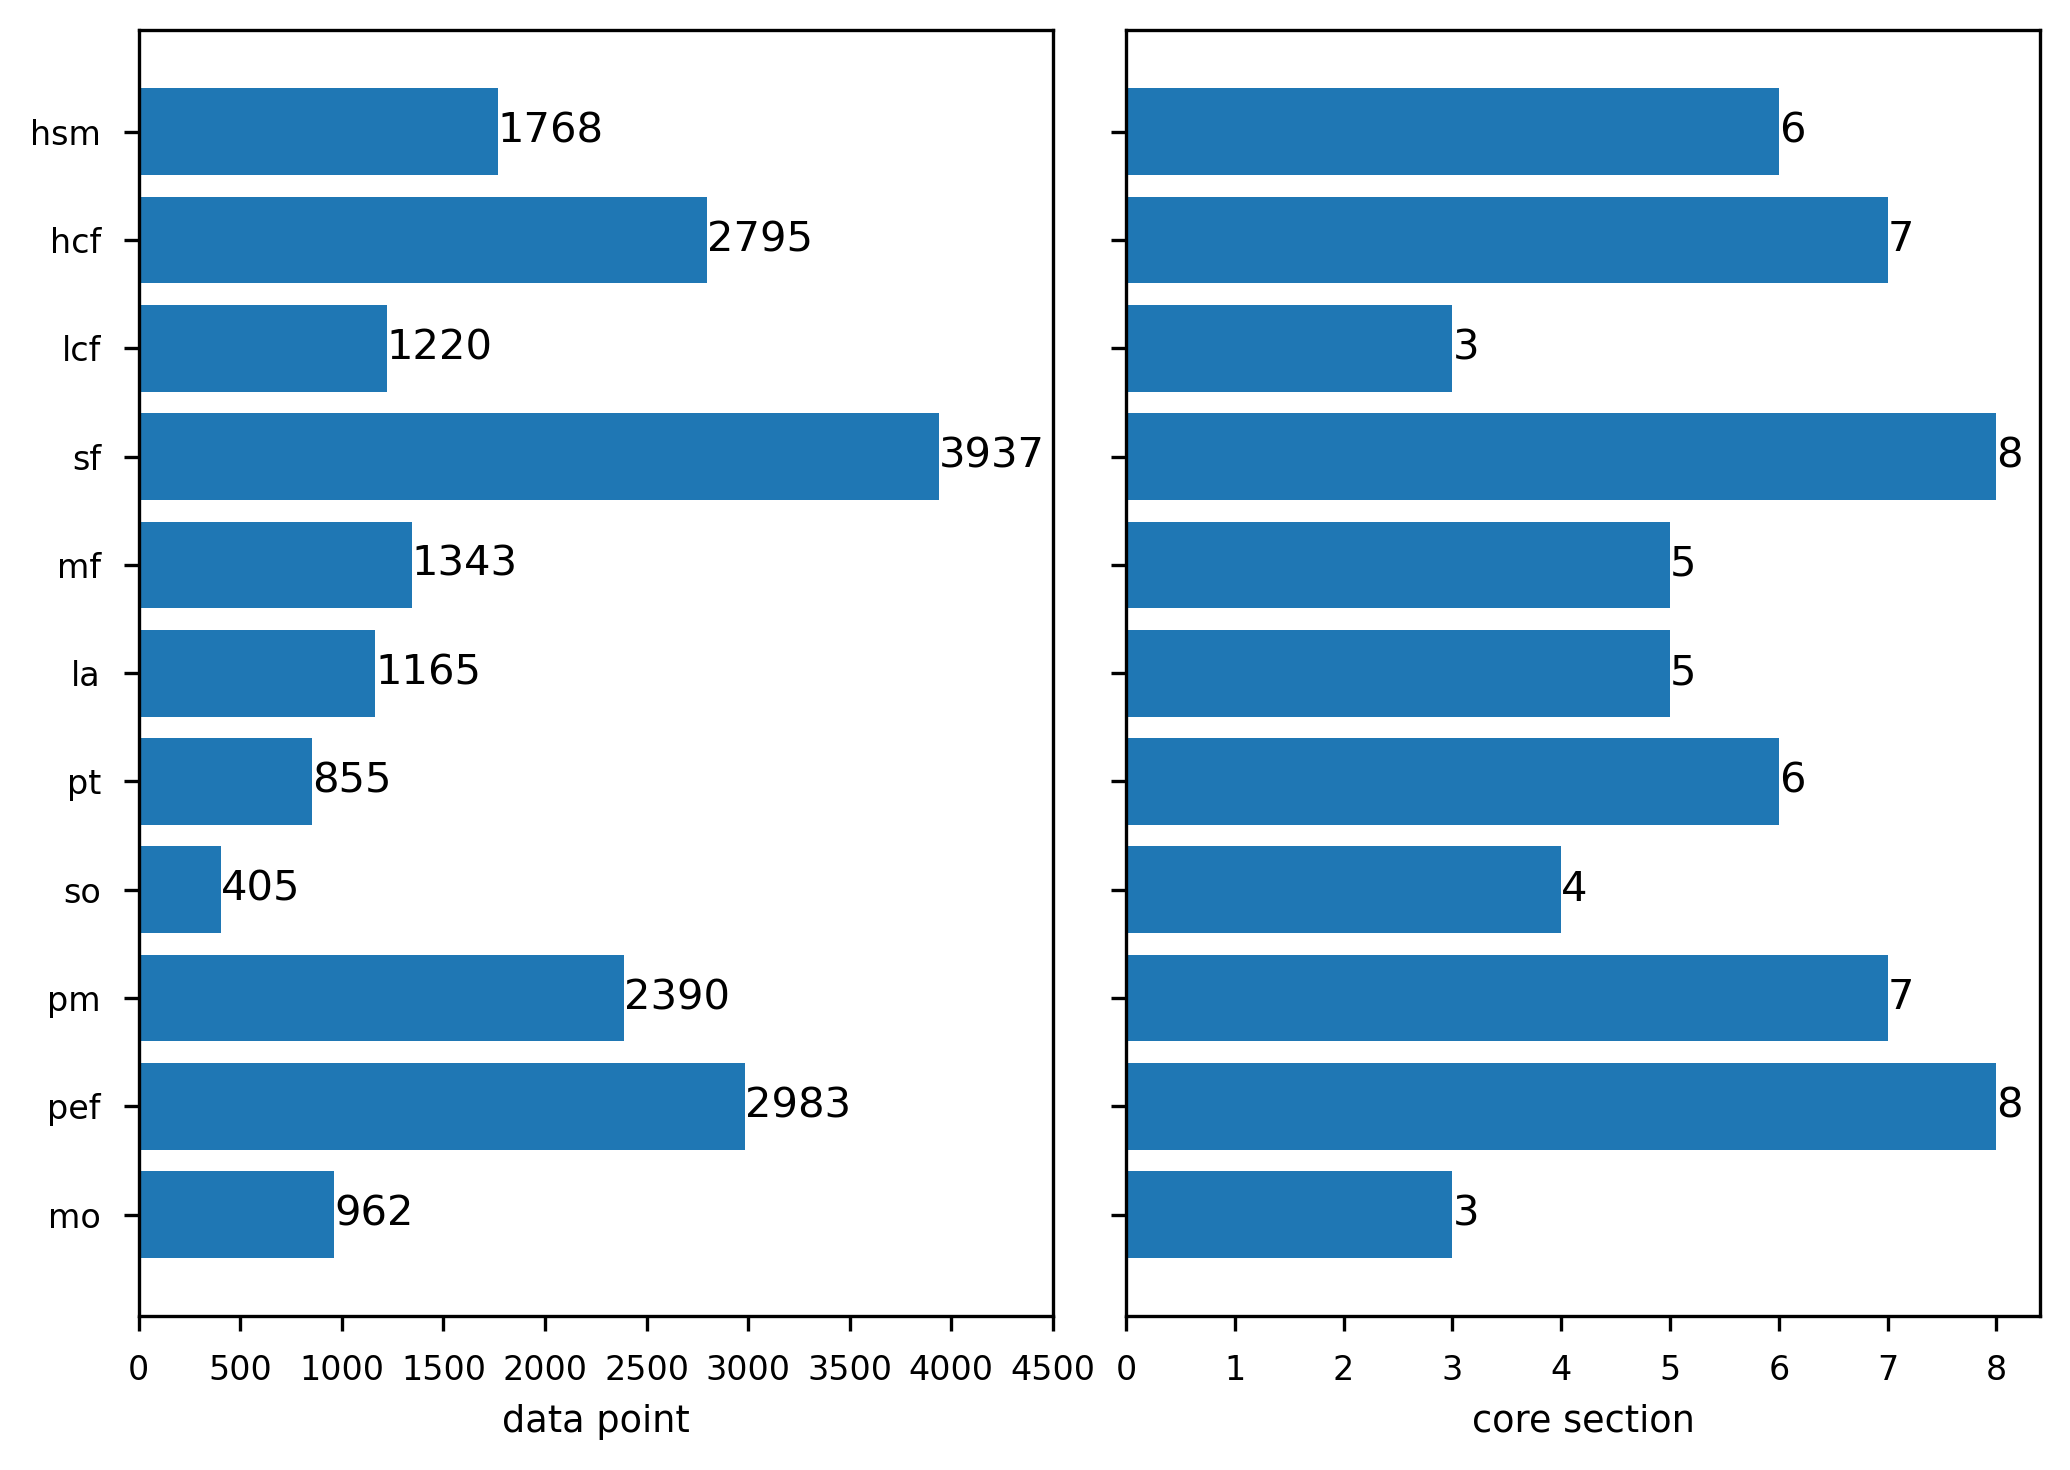

In [26]:
fig, axes = plt.subplots(1, 2, sharey='row', figsize=(7, 5))
for ax, col in zip(axes, ['data_point', 'core_section']):
    ax.barh(y=grouping.index[::-1], width=grouping[col][::-1])
    ax.set_xlabel(' '.join(col.split('_')))
    for i, row in grouping.iterrows():
        ax.text(x=row[col], 
                y=i, 
                s=row[col], va='center')

axes[0].set_xlim(0, 4500)
plt.tight_layout()
#fig.subplots_adjust(wspace=0.05)
#fig.savefig('results/r_data_distribution_{}.png'.format(date))